# Imports

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os

# Zielüberprüfung der Klassifikation (User Story 5)
@genericusername99

---

# Visualisierung der Klassenverteilung pro Datensatz (User Story 6)
@davmar01

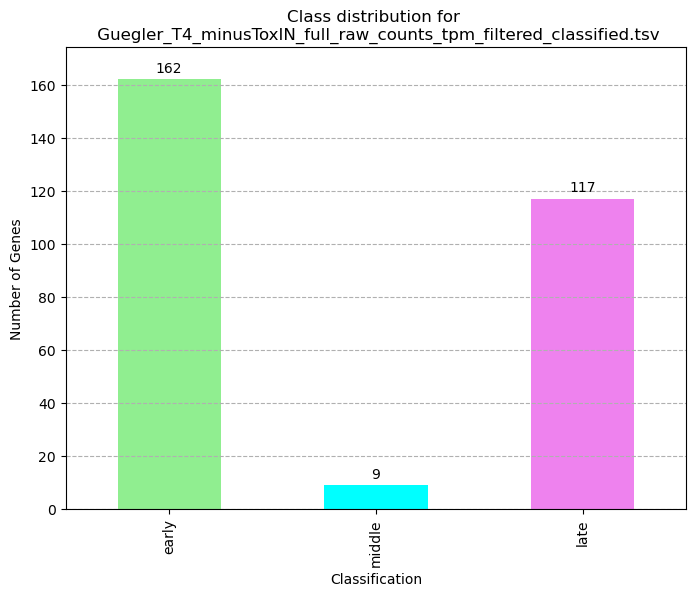

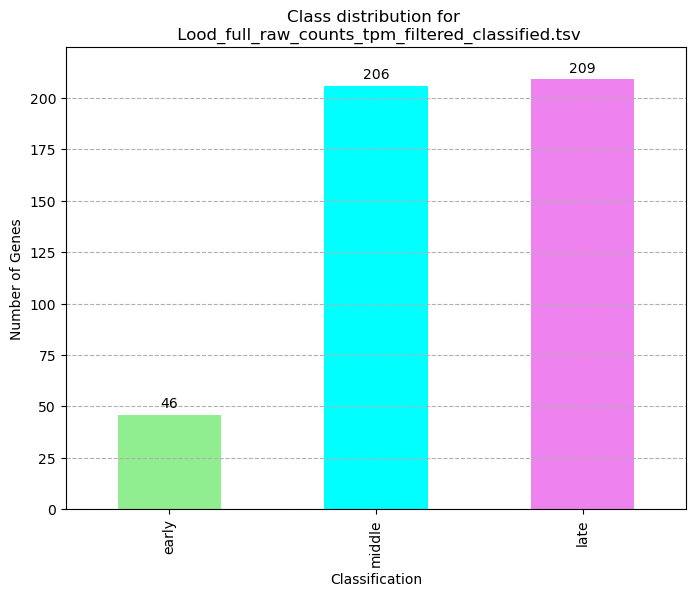

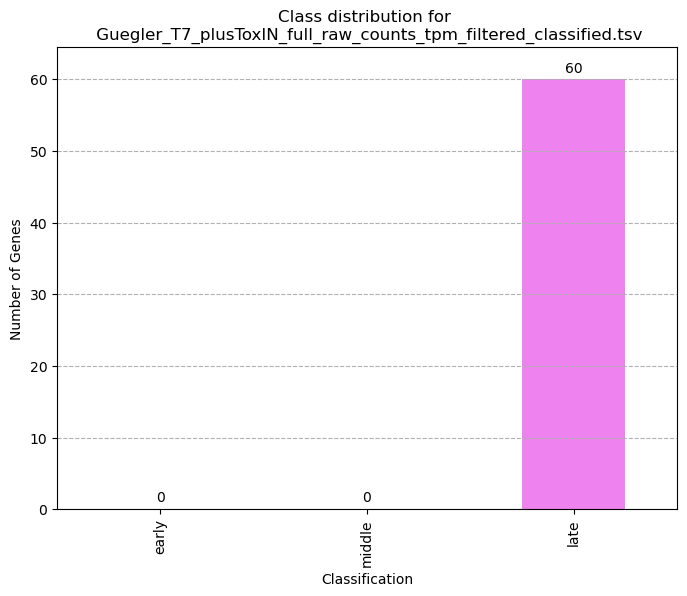

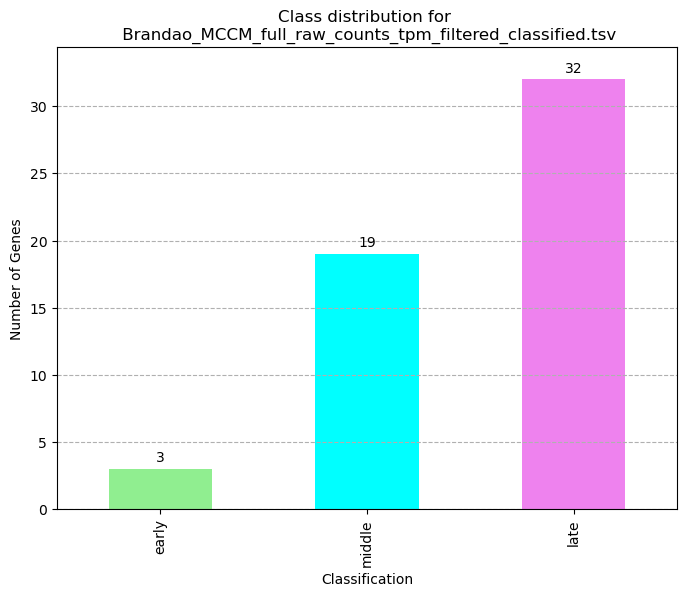

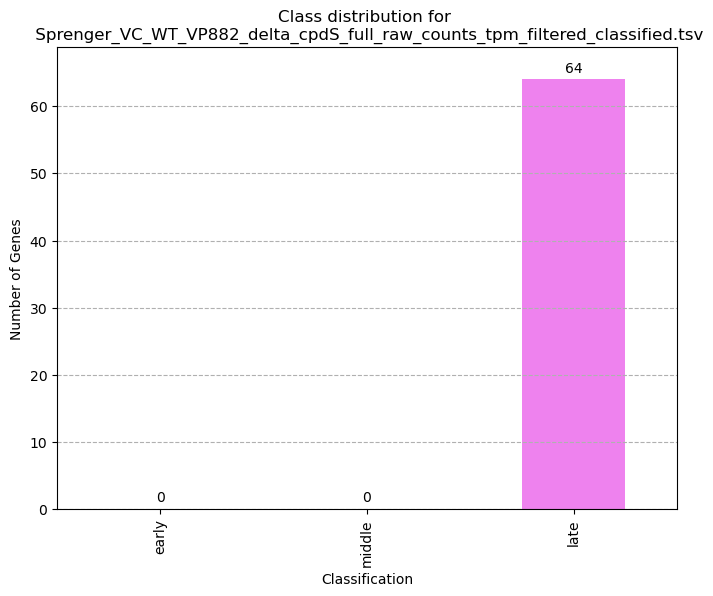

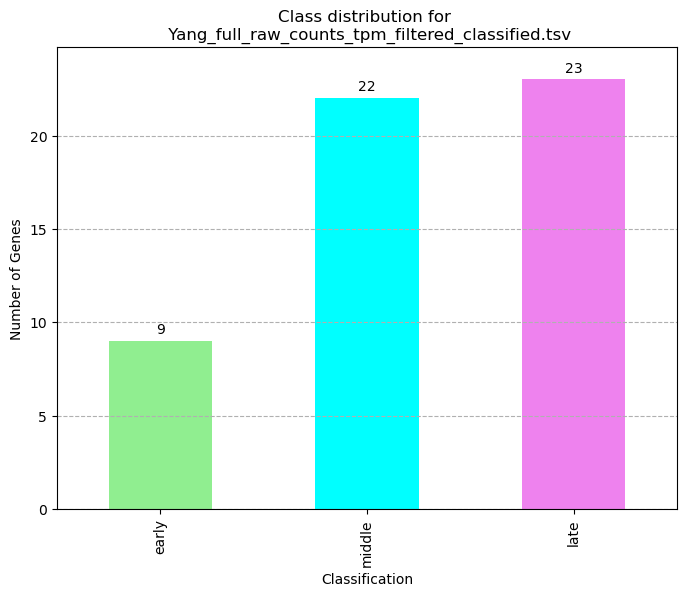

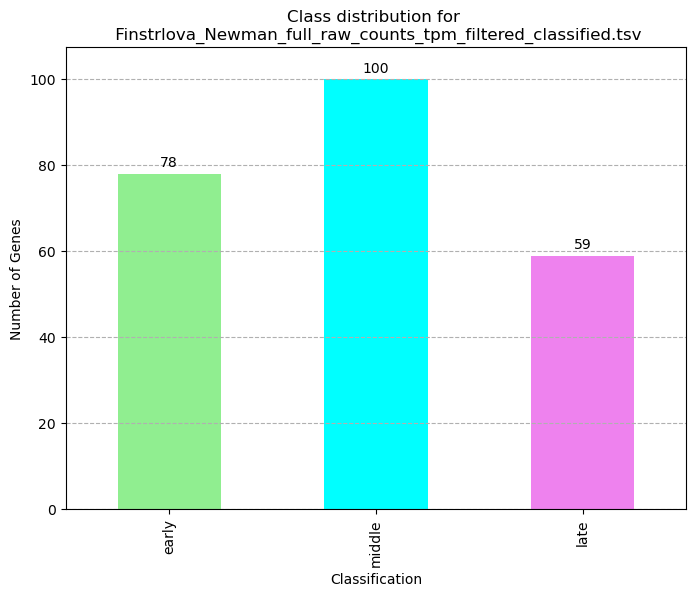

In [2]:
# Path to data
data = "../data/classified"

# Classifications
class_order = ["early", "middle", "late"]
# Color mapping
colors = {"early": "lightgreen", "middle": "cyan", "late": "violet"}

# Iterate through data set
for filename in os.listdir(data):
    # Create the full path to the item
    file_path = os.path.join(data, filename)

    df = pd.read_csv(file_path, sep="\t")

    # Check if 'classification' exists
    if "classification" in df.columns:
        # Count the frequency of each class
        class_counts_raw = df["classification"].value_counts()

        # Ensure order
        class_counts_ordered = class_counts_raw.reindex(class_order, fill_value=0)

        # Select colors in the correct order
        plot_colors = [
            colors.get(label, "gray") for label in class_counts_ordered.index
        ]

        # Create the bar chart
        plt.figure(figsize=(8, 6))
        y_max = class_counts_ordered.max()
        plt.ylim(0, y_max * 1.075)
        bars = class_counts_ordered.plot(kind="bar", color=plot_colors)
        plt.title(f"Class distribution for \n {filename}")
        plt.xlabel("Classification")
        plt.ylabel("Number of Genes")
        plt.grid(axis="y", linestyle="--")

        # Add exact numbers above the bars
        for bar_obj in bars.patches:
            y_value = bar_obj.get_height()
            x_value = bar_obj.get_x() + bar_obj.get_width() / 2.0
            plt.text(
                x_value,
                y_value + 0.01 * max(class_counts_ordered.fillna(0)),
                f"{int(y_value)}",
                ha="center",
                va="bottom",
            )

        plt.show()


### Interpretation:
#### "early"-klassifizierten Phagengenen: frühes Infektionsstadium -> der Phage beginnt, den Wirt zu übernehmen und die Zellumgebung für die eigene Replikation vorzubereiten.
#### "middle"-klassifizierten Phagengenen: die Infektion in der aktiven Replikationsphase ->  virale DNA und Proteine werden synthetisiert.
#### "late"-klassifizierten Phagengenen: Endstadium der Infektion -> Phagen werden assembliert und die Wirtszelle wird lysiert.

---

# Visualisierung der aggregierten Klassenverteilung (User Story 7)
@dottting

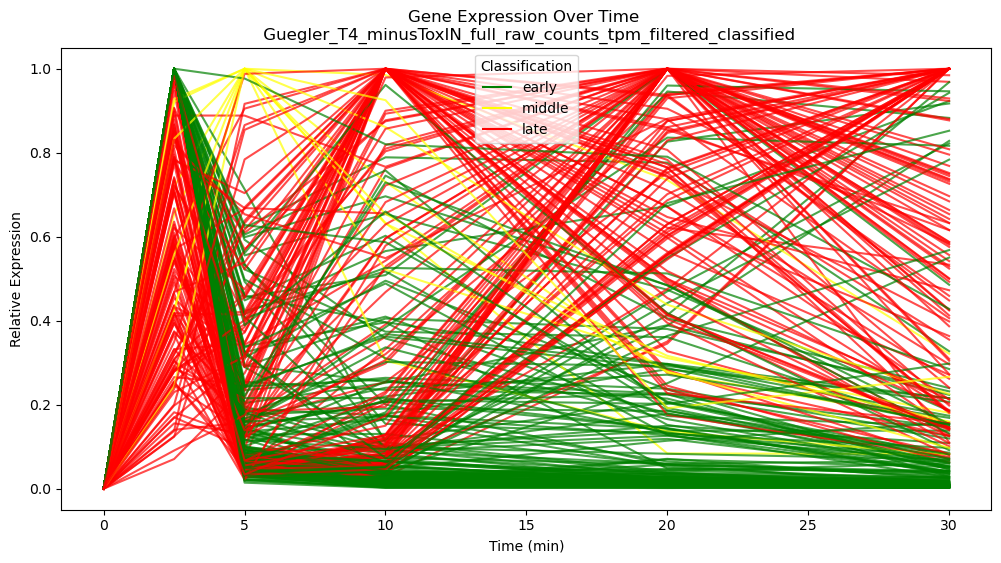

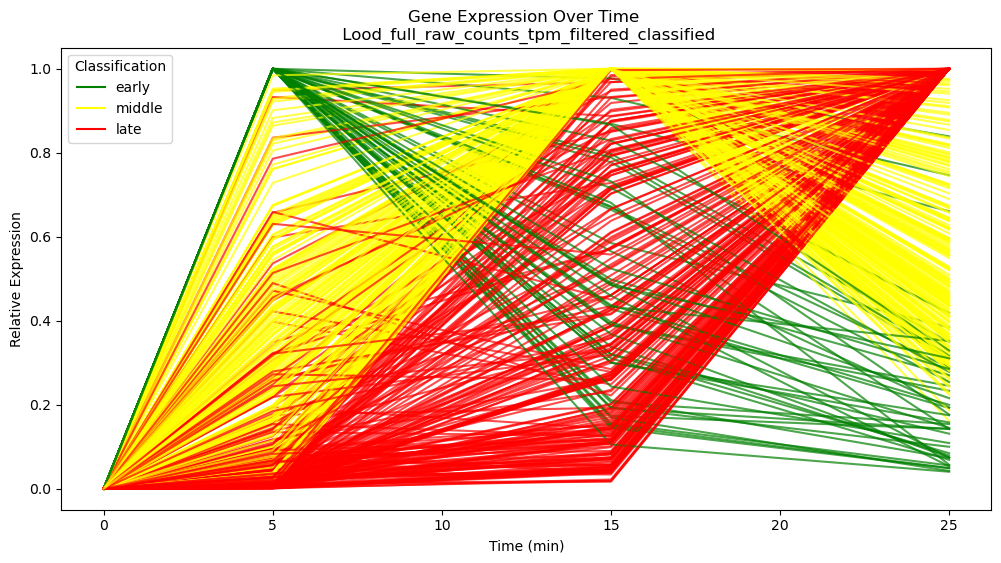

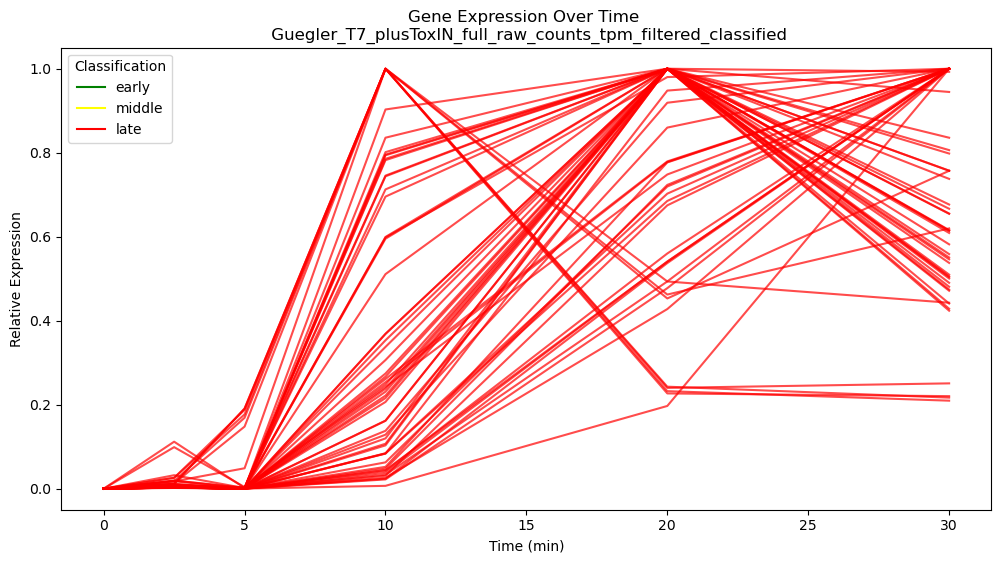

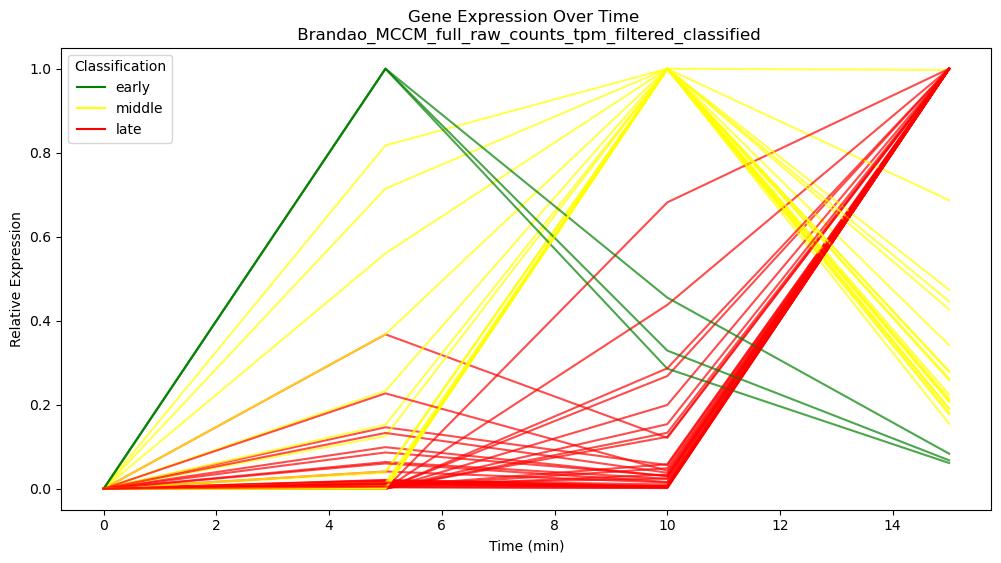

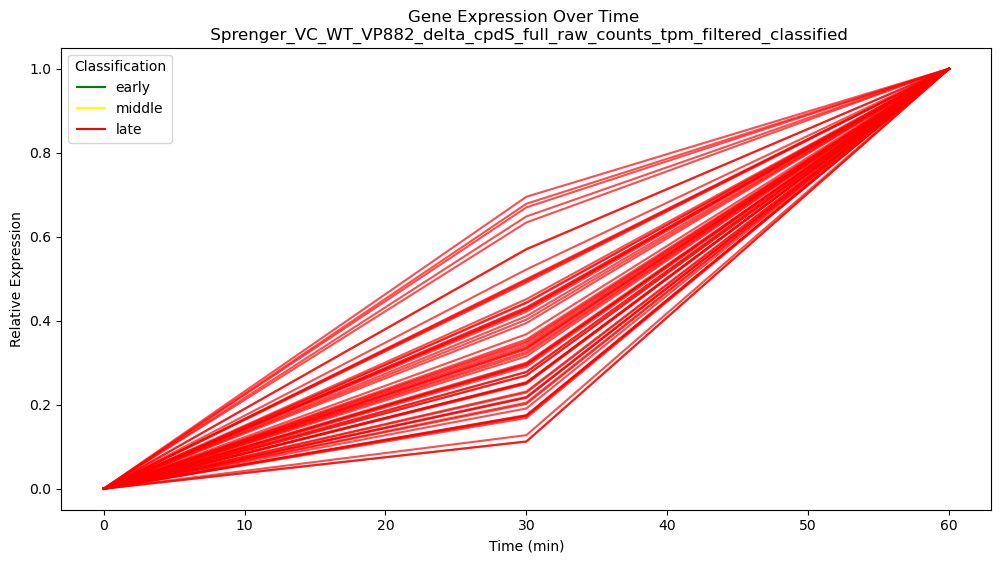

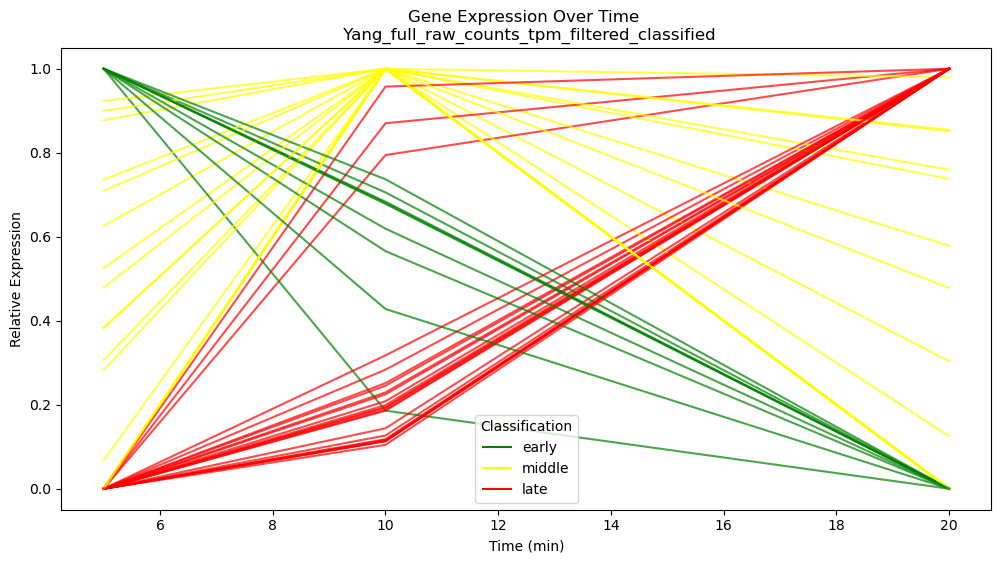

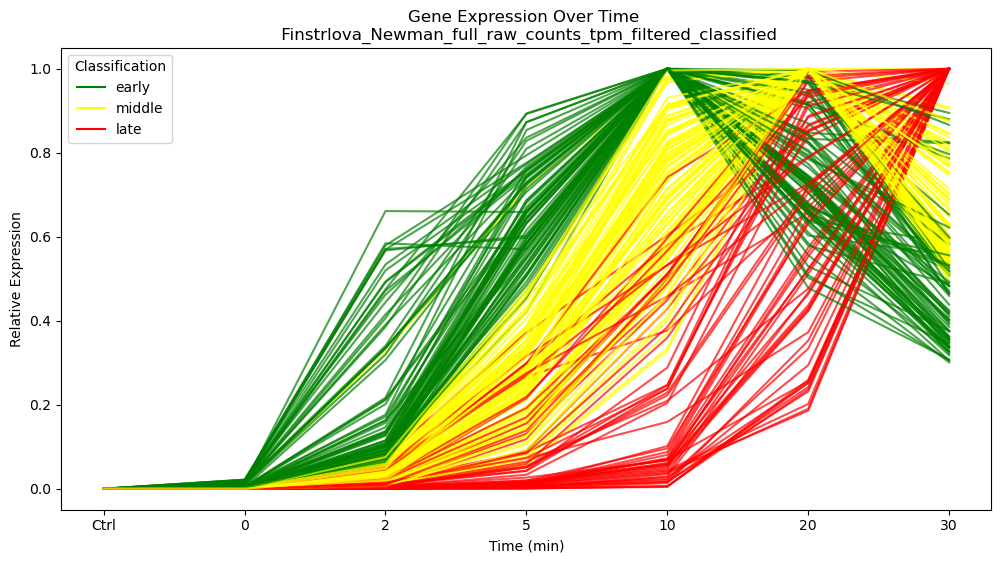

Class counts:
early     298.0
middle    356.0
late      564.0
dtype: float64


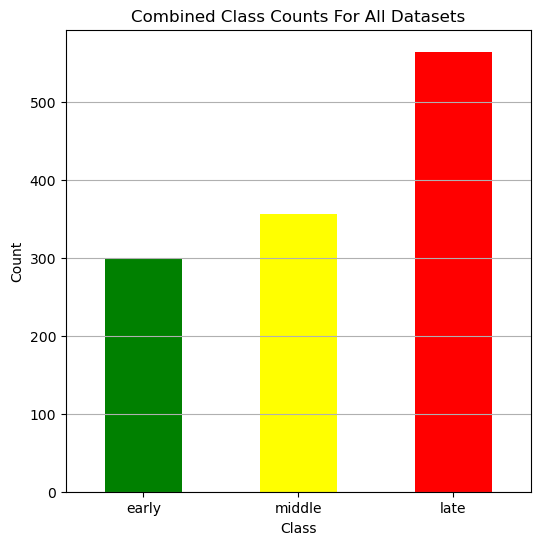

In [ ]:
def plot_expression_over_time(df_temp, dataset_name):
    """
    Plot relative Genexpression (0 bis 1) pro Gen für input Dataframe
    """
    timepoints = [col[:-2] for col in df_temp.columns if col.endswith("_T")]
    timepoints_T = [col for col in df_temp.columns if col.endswith("_T")]
    try:
        timepoints = list(map(float, timepoints))
    except:  # Exception für dataset Finstrlova "Ctrl"
        pass

    df = df_temp.copy()
    df[timepoints_T] = df[timepoints_T].apply(
        lambda row: (row - row.min()) / (row.max() - row.min())
        if row.max() != row.min()
        else 0,
        axis=1,
    )

    colormap = {"early": "green", "middle": "yellow", "late": "red"}

    plt.figure(figsize=(12, 6))

    for _, row in df.iterrows():
        expression = row[timepoints_T].values
        label = row["classification"]
        color = colormap.get(label)
        plt.plot(timepoints, expression, color=color, alpha=0.7)

    for label, color in colormap.items():
        plt.plot([], [], color=color, label=label)

    plt.xlabel("Time (min)")
    plt.ylabel("Relative Expression")
    plt.title(f"Gene Expression Over Time \n {dataset_name}")
    plt.legend(title="Classification")

    plt.show()


def plot_combined(df_list):
    """
    Plot für Klassen-counts aller Datensätze zusammen
    """
    class_counts = pd.Series(
        {
            "early": 0,
            "middle": 0,
            "late": 0,
        },
        index=["early", "middle", "late"],
    )
    for df in df_list:
        counts = df["classification"].value_counts()
        class_counts = class_counts.add(counts, fill_value=0)

    class_counts = class_counts.reindex(["early", "middle", "late"])

    print(f"Class counts:\n{class_counts}")

    plt.figure(figsize=(6, 6))
    class_counts.plot(kind="bar", color=["green", "yellow", "red"])
    plt.title("Combined Class Counts For All Datasets")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.grid(axis="y")
    plt.xticks(rotation=0)
    plt.show()


# Datensätze in dataframes laden
input_path = Path("../data/classified")
df_combined = []
for file in input_path.glob("*.tsv"):
    df = pd.read_csv(file, sep="\t")
    df = df.drop(columns=df.columns[1:7])  # Drop unused cols
    df_combined.append(df)
    plot_expression_over_time(df, file.stem)

plot_combined(df_combined)